# CAPSTONE PROJECT - Battle of the Neighborhoods (Week -2)

## About this notebook:

This Notebook has been designed as an **USER INTERACTIVE** notebook, hence this notebook is dynamic in nature. The user will have the option of **choosing** preferences, including the **source of data**, based upon his/her **requirements** and the outcome/ result will depened upon the inputs/ choices the user provides.

## Table of contents
<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1. <a href="#INTRODUCTION">Introduction</a>

2. <a href="#DATA">Data</a>

3. <a href="#City">Selecting the city, data-source, and type of property</a>

4. <a href="#Prop_anal">Analyzing property rates and scoring locations : Criteria 1</a>
    
5. <a href="#Rest_anal">Analyzing/ scoring locations based on restaurants using Foursquare API : Criteria-2</a>
    
6. <a href="#hotel_anal">Analyzing/ scoring locations based on hotels using Foursquare API : Criteria-3</a>
    
7. <a href="#Airport">Analyzing/ scoring locations based on distance from airport : Criteria-4</a>

8. <a href="#weightage">User preference and weight for each criteria</a>
    
9. <a href="#FINAL">Final Scoring - chosing the best location</a>
 
</font>
</div>

<a id= "INTRODUCTION"></a>

## 1. INTRODUCTION

The project deals with the problem of selecting a suitable area within a host of cities to set up an office. 
The client is an EVENT MANAGEMENT entity, and specializes in conducting corporate seminars/ conferences.

It plans to open up an office which will meet the following **parameters/criteria**:

1. The office has to be located in an area where **commercial property rates** are low. 
2. The office has to be located in an area where there are a good number of **restaurants** so that its customers may have variety of choices for their snacks/ food in case hotel menu is not to their liking.
3. The office has to be located in an area where there are a good number of **hotels** so that it can arrange for both  conferences and lodging for the customers.
4. The office has to be located within the vicinity of the **city airport** so that its customers may save time in transit.

### BUSINESS PROBLEM

**While there are various real estate websites providing the data on commercial properties and various other websites providing location of restaurants and hotels, the client needs to find an optimum location meeting the above 4 criteria. Such a website or other resource is not readily available.**

**Even if the client scrapes through websites and other sources of information, gathering, aggregating and processing such raw data for locating such an area/ location will not be possible.**

**How will the management decide and finalize such a location ?**


**Such problems and situations can be dealt through Applied Data Science. The following notebook will try to provide a solution to the above problem**

<br></br>
**NOTE:**
The notebook will provide the following **OPTIONS** to the user:

1. **Choose a city** from the 4 metropolitan cities in India - namely: 
        i.Mumbai, 
        ii.New Delhi, 
        iii. Kolkata, and 
        iv. Chennai.
        
        
2. **Choose** ways of selecting the **database**, namely:
        i. Scrape through website and take database from the site :(www.magicbricks.com/)
        ii. Use existing database.
    
   In case the website **may not be available** or **block the user** from scrapping, the program will automatically      **redirect** the user to the existing database.

3. **Choose** the **type of property**, i.e:
        Buy a property under construction,
        Buy a readily available property, and
        Take a property on lease rentals.


4. **Assigning Weights** to all the 4 parameters/ criteria on a scale of 100 based upon the preference of the user *('0' being of no importance and '100' being of maximum importance)*. 

<a id='DATA'></a>

## 2. DATA

**This section delas with the following**:

1. Importing and initializing the necessary libraries.

2. Creating back-up database of cities, which will be used/ routed directly in case website scraping is not available.

3. Creating necessary lists and dictionaries, including the list if errors which might occur in case web scrpaing is not allowed by the website.

### Initializing and importing the necessary libraries:

In [2]:
# @hidden_cell

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup
import requests
import urllib.request

print('Libraries imported.')

Libraries imported.


### Creating back-up database of cities

In [3]:
array_che=[['PH Road', 413, 10920, 12000, 80, '8%'],
       ['Nungambakkam', 359, 12226, 13436, 51, '4.50%'],
       ['Old Mahabalipuram Road', 314, 5193, 5644, 33, '7%'],
       ['T Nagar', 282, 8909, 9791, 64, '7.90%'],
       ['Guindy', 209, 8156, 8865, 52, '7%'],
       ['Alwarpet', 207, 13681, 15201, 28, '2.20%'],
       ['Egmore', 176, 8579, 9428, 60, '7.60%'],
       ['Mount Road', 159, 3299, 10312, 85, '9.90%'],
       ['Ashok Nagar', 133, 13015, 13995, 27, '2.30%'],
       ['Kodambakkam', 121, 10375, 11038, 30, '3.30%'],
       ['Adyar', 113, 10768, 11833, 41, '4.10%'],
       ['Velachery', 110, 9804, 10098, 50, '5.90%'],
       ['Mylapore', 109, 14109, 15171, 62, '4.90%'],
       ['Royapettah', 87, 4977, 5352, 27, '6%'],
       ['Teynampet', 86, 14837, 15953, 80, '6%'],
       ['Kilpauk', 82, 14493, 15256, 32, '2.50%'],
       ['Perungudi', 75, 5621, 5917, 65, '13.20%'],
       ['Anna Nagar', 72, 5542, 5833, 63, '13%'],
       ['Ekkatuthangal', 68, 6975, 7500, 29, '4.60%'],
       ['Nandanam', 57, 20700, 22500, 131, '7%'],
       ['Guindy Industrial Estate', 56, 10203, 11090, 65, '7%'],
       ['Chetpet', 55, 11367, 12222, 52, '5.10%'],
       ['Anna Salai', 53, 7339, 8064, 65, '9.70%'],
       ['Mambalam West', 52, 7667, 8333, 36, '5.20%'],
       ['East Coast Road', 49, 1860, 2000, 13, '8%']]

array_nd= [['Okhla', 597, 13364, 14370, 65, '5.40%'],
       ['Nehru Place', 474, 20000, 20600, 88, '5.10%'],
       ['Pitampura', 447, 19365, 20385, 56, '3.30%'],
       ['Laxmi Nagar', 392, 15256, 16405, 58, '4.20%'],
       ['Janakpuri', 390, 19923, 21893, 40, '2.20%'],
       ['Netaji Subhash Place', 369, 18508, 19690, 79, '4.80%'],
       ['Saket', 327, 21957, 24129, 94, '4.70%'],
       ['Dwarka', 317, 4385, 4615, 15, '4%'],
       ['Kirti Nagar', 316, 9035, 9820, 41, '5.10%'],
       ['Bhikaji Cama Place', 259, 22860, 25400, 107, '5%'],
       ['Lajpat Nagar', 243, 15734, 16562, 73, '5.30%'],
       ['Jasola', 240, 17704, 19671, 115, '7%'],
       ['Okhla Phase 3', 230, 16820, 17706, 80, '5.40%'],
       ['Kalkaji', 196, 16320, 17934, 51, '3.40%'],
       ['Okhla Phase 1', 188, 14177, 15244, 54, '4.20%'],
       ['Preet Vihar', 179, 15401, 17112, 128, '9%'],
       ['Malviya Nagar', 173, 12624, 13872, 76, '6.60%'],
       ['Barakhamba Road', 160, 25008, 27182, 113, '5%'],
       ['Vikas Marg', 144, 11051, 11883, 75, '7.60%'],
       ['East Of Kailash', 132, 14574, 15842, 156, '11.80%'],
       ['Karol Bagh', 126, 13139, 33066, 106, '3.80%'],
       ['Rajouri Garden', 123, 17075, 17974, 62, '4.10%'],
       ['Okhla Phase 2', 116, 25020, 27494, 49, '2.10%'],
       ['Vasant Kunj', 108, 18096, 19670, 76, '4.60%'],
       ['Rajendra Place', 105, 14459, 15889, 90, '6.80%']]

array_mum= [['Andheri East', 3071, 17397, 17918, 98, '6.60%'],
       ['Andheri West', 952, 18366, 22960, 116, '6.10%'],
       ['Goregaon East', 697, 13518, 16465, 85, '6.20%'],
       ['Chakala', 663, 15808, 17695, 40, '2.70%'],
       ['Malad West', 636, 17765, 18298, 73, '4.80%'],
       ['Lower Parel', 540, 19321, 21468, 150, '8.40%'],
       ['Chembur', 378, 16031, 21266, 162, '9.10%'],
       ['Mindspace', 361, 15021, 16328, 67, '4.90%'],
       ['Vikhroli West', 295, 14000, 14420, 70, '5.80%'],
       ['Powai', 284, 14245, 23262, 116, '6%'],
       ['Nariman Point', 279, 32472, 34916, 188, '6.50%'],
       ['Andheri Kurla Road', 243, 15816, 16310, 101, '7.40%'],
       ['Bandra Kurla Complex', 235, 27785, 30049, 272, '10.90%'],
       ['Mulund West', 230, 16062, 17052, 68, '4.80%'],
       ['Sakinaka Junction', 214, 12899, 14175, 36, '3.10%'],
       ['Chandivali', 200, 10243, 11256, 94, '10%'],
       ['Worli', 189, 25131, 27316, 108, '4.80%'],
       ['Goregaon West', 188, 18513, 19488, 56, '3.40%'],
       ['Borivali West', 169, 19192, 20636, 81, '4.70%'],
       ['Sakinaka', 168, 11000, 17472, 93, '6.40%'],
       ['Kandivali West', 166, 18564, 20627, 71, '4.10%'],
       ['Borivali East', 163, 16000, 19941, 75, '4.50%'],
       ['Kandivali East', 157, 16803, 18067, 73, '4.90%'],
       ['JB Nagar', 152, 13675, 15027, 100, '8%'],
       ['Marol Naka', 151, 13266, 13965, 50, '4.30%']]

array_kol = [['Salt Lake City', 1489, 7460, 8109, 49, '7.30%'],
       ['Rajarhat', 329, 5353, 5956, 25, '5%'],
       ['New Town', 168, 4616, 5905, 44, '8.90%'],
       ['Park Street', 151, 22004, 22664, 85, '4.50%'],
       ['Kalighat', 130, 7650, 8138, 52, '7.70%'],
       ['A J C Bose Road', 106, 15500, 15965, 80, '6%'],
       ['Ballygunge', 103, 10031, 11146, 39, '4.20%'],
       ['Kasba', 101, 7403, 8226, 38, '5.60%'],
       ['Gariahat', 95, 20240, 22000, 41, '2.20%'],
       ['Camac St-Park Street area', 85, 19500, 20085, 98, '5.80%'],
       ['Salt Lake City Sector 2', 83, 7651, 8502, 18, '2.60%'],
       ['Kasba East', 81, 8324, 9048, 33, '4.40%'],
       ['Rash Behari Ave', 81, 10594, 11270, 49, '5.20%'],
       ['Hazra', 78, 8625, 9375, 46, '5.90%'],
       ['New Alipore', 76, 6595, 7248, 30, '4.90%'],
       ['E M Bypass', 72, 4500, 9485, 64, '8.10%'],
       ['Bhawanipur', 63, 9811, 10901, 38, '4.20%'],
       ['Strand Road', 59, 12506, 13742, 92, '8%'],
       ['Garia', 58, 5765, 6199, 26, '5%'],
       ['Action Area 2', 56, 5329, 5969, 30, '6%'],
       ['B B D Bagh', 55, 14000, 15003, 86, '6.90%'],
       ['Southern Avenue', 53, 8537, 9280, 45, '5.80%'],
       ['Minto Park', 48, 13485, 14346, 80, '6.70%'],
       ['Topsia', 47, 9563, 10509, 53, '6%'],
       ['Lake Town', 47, 5112, 5438, 60, '13.20%']]   
print("done")

done


### Creating lists/ dictionaries of websites for scraping and other necessary lists/ arrays

In [4]:
list_website = {"kolkata": "https://www.magicbricks.com/property-for-sale-rent-in-Kolkata/commercial-real-estate-Kolkata",
        "chennai" :"https://www.magicbricks.com/property-for-sale-rent-in-Chennai/commercial-real-estate-Chennai",
       "mumbai" : "https://www.magicbricks.com/property-for-sale-rent-in-Mumbai/commercial-real-estate-Mumbai",
        "new delhi" : "https://www.magicbricks.com/property-for-sale-rent-in-New-Delhi/commercial-real-estate-New-Delhi"}
city_list=['kolkata','chennai','new delhi','mumbai']
array_list_city= {"kolkata":array_kol, "chennai": array_che, "mumbai":array_mum, "new delhi": array_nd}
print("done")   

done


### Creating the list of errors that might arise owing while scraping website

In [5]:
con_list =['<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>403 Forbidden</title>\n</head><body>\n<h1>Forbidden</h1>\n<p>You don\'t have permission to access /bricks/property-for-sale-rent-in-Chennai/commercial-real-estate-Chennai\non this server.<br />\n</p>\n</body></html>\n',
          '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>403 Forbidden</title>\n</head><body>\n<h1>Forbidden</h1>\n<p>You don\'t have permission to access /bricks/property-for-sale-rent-in-Kolkata/commercial-real-estate-Kolkata\non this server.<br />\n</p>\n</body></html>\n',
          '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>403 Forbidden</title>\n</head><body>\n<h1>Forbidden</h1>\n<p>You don\'t have permission to access /bricks/property-for-sale-rent-in-Mumbai/commercial-real-estate-Mumbai\non this server.<br />\n</p>\n</body></html>\n',
          '<!DOCTYPE HTML PUBLIC "-//IETF//DTD HTML 2.0//EN">\n<html><head>\n<title>403 Forbidden</title>\n</head><body>\n<h1>Forbidden</h1>\n<p>You don\'t have permission to access /bricks/property-for-sale-rent-in-New-Delhi/commercial-real-estate-New-Delhi\non this server.<br />\n</p>\n</body></html>\n']

<hr></hr>

<a id= "City"></a>

## 3. SELECTING THE CITY, DATA SOURCE AND TYPE OF PROPERTY

Now that the necesarry database, libraries, lists and dictionaries have been loaded, the user is ready to exercise his options.

In this section, the **user will be prompted** for the folloiwng:

1. Choice of city.
2. Choice of data set *(whether web-scrapping or use existing database).*
3. Choice of the type of property.
<br></br>
The section will also focus on **data-cleaning** and **data -wrangling** at each stage, and will deal with errors arising out of **invalid entries.**

### Choice of city

**The user will be prompted to choose from the 4 metro cities of India, namely Mumbai, New Delhi, Kolkata and Chennai.**

<img src ="http://travelsfinders.com/wp-content/uploads/2016/07/map-india.jpg">
<p> <i>Source of image: http://travelsfinders.com/india-metro-map.html </i><p>


### Prompting the user to input his/her choice of city

**In case the user inputs a wrong entry, the programme will direct the user till a valid choice is chosen.**

In [6]:
print("\n\nAvailable Cities\n\n" , city_list)
city = input("\n\nEnter Your City:").lower()
while city not in city_list:
    print("\n\nINVALID ENTRY ...... TRY AGAIN")
    city = input("\n\nEnter Your City:").lower()
else:
    print("\n\nYou have chosen :\n\n",city)



Available Cities

 ['kolkata', 'chennai', 'new delhi', 'mumbai']




Enter Your City: new york




INVALID ENTRY ...... TRY AGAIN




Enter Your City: kolkata




You have chosen :

 kolkata


<hr></hr>

### Prompting the user to choose his/her choice of data source

<br>**The below code executes the folloiwng:**</br>
<br>1. Prompts the user to choose the source of data.</br>
<br>2. In case the website refuses to connect for web-scrapping, the programme automatically redirects the user to the existing database for the chosen city. **Errors/ exceptions are handled.**</br>
<br>3. Data-cleaning and Data-wrangling.</br>
<br>4. Creating a dataframe withlist of areas/ locations along with property rates 


In [7]:
choice=["A","B"]
choice_set= input("\n\nFor running on existing database, enter 'A',\nFor scrapping through website, enter 'B'\n\nEnter your choice").upper()
while choice_set not in choice:
    print ("\n\nINVALID ENTRY TRY AGAIN")
    choice_set= input("\n\nFor running on existing database, enter 'A',\nFor scrapping through website, enter 'B'\n\nEnter your choice").upper()
if choice_set =="A":
    print("\n\nYou have decided to use the existing dataset")
    df_final=pd.DataFrame(array_list_city.get(city),columns=["Location", "No_of_prop", "SP_under_cons", "SP_leased_prop", "Rentals_per_month", "ROI"] )
elif choice_set=="B":
    print("\n\nYou have decided to use the scrape through the website")
    print(list_website.get(city))
    website_url = requests.get(list_website.get(city)).text
    if website_url in con_list :
        print ("Error ! The website refused to connect\n\nRouting through the existing databse")
        df_final=pd.DataFrame(array_list_city.get(city),columns=["Location", "No_of_prop", "SP_under_cons", "SP_leased_prop", "Rentals_per_month", "ROI"] )
    else:
        website_url = requests.get(list_website.get(city)).text
        soup = BeautifulSoup(website_url,"lxml")
        table0_kol= soup.find_all('table')[0]
        table1_kol= soup.find_all('table')[1]
        
        table_rows0_kol = table0_kol.find_all('tr')
        table_rows1_kol = table1_kol.find_all('tr')
        
        NP0 =[]
        for tr0 in table_rows0_kol:
            td0 = tr0.find_all('td')
            row0 = [i.text for i in td0]
            NP0.append(row0)
        
        NP1 =[]
        for tr1 in table_rows1_kol:
            td1 = tr1.find_all('td')
            row1 = [i.text for i in td1]
            NP1.append(row1)
        
        df0_table=pd.DataFrame(NP0, columns=["Location", "No_of_prop", "SP_under_cons", "SP_leased_prop", "Rentals_per_month", "ROI"] )
        df1_table=pd.DataFrame(NP1,columns=["Location", "No_of_prop", "SP_under_cons", "SP_leased_prop", "Rentals_per_month", "ROI"] )
        df_final=pd.concat([df0_table, df1_table], axis=0, ignore_index= True)
        df_final.drop(df_final.index[0], inplace= True)
        df_final['SP_under_cons']= df_final['SP_under_cons'].apply(lambda x: x.strip('₹ '))
        df_final['SP_leased_prop']= df_final['SP_leased_prop'].apply(lambda x: x.strip('₹ '))
        df_final['Rentals_per_month']= df_final['Rentals_per_month'].apply(lambda x: x.strip('₹ '))
        df_final['Rentals_per_month'] = pd.to_numeric(df_final['Rentals_per_month'])
        df_final['SP_leased_prop'] = df_final['SP_leased_prop'].str.replace(",","")
        df_final['SP_leased_prop'] = pd.to_numeric(df_final['SP_leased_prop'])
        df_final['SP_under_cons'] = df_final['SP_under_cons'].str.replace(",","")
        df_final['SP_under_cons'] = pd.to_numeric(df_final['SP_under_cons'])

    
df_final



For running on existing database, enter 'A',
For scrapping through website, enter 'B'

Enter your choice c




INVALID ENTRY TRY AGAIN




For running on existing database, enter 'A',
For scrapping through website, enter 'B'

Enter your choice b




You have decided to use the scrape through the website
https://www.magicbricks.com/property-for-sale-rent-in-Kolkata/commercial-real-estate-Kolkata


,Location,No_of_prop,SP_under_cons,SP_leased_prop,Rentals_per_month,ROI
1,Salt Lake City,1489,7460,8109,49,7.3%
2,Rajarhat,329,5353,5956,25,5%
3,New Town,168,4616,5905,44,8.9%
4,Park Street,151,22004,22664,85,4.5%
5,Kalighat,130,7650,8138,52,7.7%
6,A J C Bose Road,106,15500,15965,80,6%
7,Ballygunge,103,10031,11146,39,4.2%
8,Kasba,101,7403,8226,38,5.6%
9,Gariahat,95,20240,22000,41,2.2%
10,Camac St-Park Street area,85,19500,20085,98,5.8%


**Note on the above table:**

1. **Location** : Top Commerical Areas/ locations within the city.
2. **No_of_prop** : Number of commercial properties available.
3. **SP_under_cons** : Selling price of properties under construction.
4. **SP_leased_prop** : Selling price of readily available properties.
5. **Rentals_per_month** : Existing rates if properties are taken on rent.
6. **ROI** : Return on investment if the property is held for investment purpose.

**PS**  : All the prices/ rates are in  ***Rs.per sq.ft***
<hr></hr>

### Chosing of the type property

**The code in the cell below will execute the following:**

1. Prompt the user to chose type of property.
2. **Handle errors/ exceptions** in case an invalid option is entered.
3. Provide a dataframe to the user.

**CHOSING OPTIONS:**
##### 1. For taking property on rent, enter "PR"
##### 2. For buying readily available property, enter "PS"
##### 3. For buying property under construction, enter "PC"

In [8]:
prop_choice=["PR","PS", "PC"]
prop_input=input("\nEnter Your Choice\n").upper()
while prop_input not in prop_choice:
    print("\nINVALID ENTRY... PLEASE TRY AGAIN")
    prop_input=input("\nEnter Your Choice\n").upper()
if prop_input =="PR":
    print("You have chosen to take property on rent..... getting database.")
    df_final.drop(['SP_under_cons', 'SP_leased_prop', 'ROI'], axis=1, inplace= True)
    df_final.rename(columns={"Rentals_per_month":"Price/rentals"},inplace= True)
elif prop_input =="PS":
    print("You have chosen to buy readily available property..... getting database.")
    df_final.drop(['SP_under_cons', 'Rentals_per_month', 'ROI'], axis=1, inplace= True)
    df_final.rename(columns={"SP_leased_prop":"Price/rentals"}, inplace= True)
elif prop_input =="PC":
    print("You have chosen to buy porperty under construction..... getting database.")
    df_final.drop(['SP_leased_prop', 'Rentals_per_month', 'ROI'], axis=1, inplace= True)
    df_final.rename(columns={"SP_under_cons":"Price/rentals"}, inplace= True)

df_final


Enter Your Choice
 gt



INVALID ENTRY... PLEASE TRY AGAIN



Enter Your Choice
 pr


You have chosen to take property on rent..... getting database.


,Location,No_of_prop,Price/rentals
1,Salt Lake City,1489,49
2,Rajarhat,329,25
3,New Town,168,44
4,Park Street,151,85
5,Kalighat,130,52
6,A J C Bose Road,106,80
7,Ballygunge,103,39
8,Kasba,101,38
9,Gariahat,95,41
10,Camac St-Park Street area,85,98


<hr></hr>

<a id="Prop_anal"></a>

## 4. ANALYZING PORPERTY RATES AND SCORING LOCATIONS : CRITERIA - 1

<hr></hr>

#### In this section, the properties rates are analyzed with the objective of ranking/ scoring each area/ location based on the price/ rentals for the type of property chosen by the user.

**The code in the cell below will display the scores arrived for each location based upon the type of property chosen by the user and create a dataframe with ranking/ score for each locality/area.**

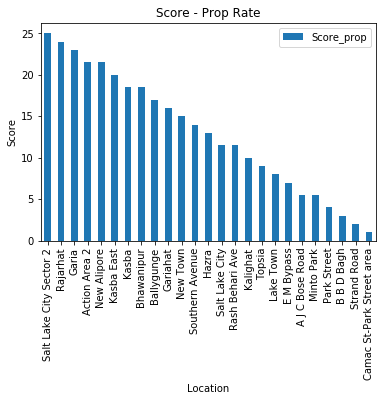

,Location,No_of_prop,Price/rentals,Score_prop
11,Salt Lake City Sector 2,83,18,25.0
2,Rajarhat,329,25,24.0
19,Garia,58,26,23.0
20,Action Area 2,56,30,21.5
15,New Alipore,76,30,21.5
13,Kasba East,81,33,20.0
8,Kasba,101,38,18.5
17,Bhawanipur,63,38,18.5
7,Ballygunge,103,39,17.0
9,Gariahat,95,41,16.0


In [9]:
df_final["Score_prop"]= df_final["Price/rentals"].rank(ascending=False)
df_final.sort_values("Price/rentals", ascending= True,inplace= True)
df_final.plot('Location','Score_prop', kind= 'bar')
plt.title("Score - Prop Rate")
plt.xlabel("Location")
plt.ylabel("Score")
plt.show()
df_final

**Note:**

1. Score is based upon lowest price/ rental criteria - the location with the lowest price/ rentals will get the highest score.
2. For locations where price/ rentals are equal, scoring is divided amongst the number of such locations.
<hr></hr>

#### The following code maps the location with the latitude and longitude using the **GEOLOCATOR** library.

In [10]:
locationarray = np.array(df_final["Location"])
lat =[]
lon =[]
for p in range (0, len(df_final["Location"].value_counts())):
    address = (locationarray[p] + "," +city)
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    if location == None:
        print("error ! The geograpical coordinate of" , locationarray[p],"could not be found")
        lat.append("not available")
        lon.append("not available")
    else:
        latitude=location.latitude
        longitude = location.longitude
        print('The geograpical coordinate of' , locationarray[p], 'are {}, {}.'.format(latitude, longitude))
        lat.append(latitude)
        lon.append(longitude)

error ! The geograpical coordinate of Salt Lake City Sector 2 could not be found
The geograpical coordinate of Rajarhat are 22.6231943, 88.4437332.
The geograpical coordinate of Garia are 22.4661325, 88.4051064.
The geograpical coordinate of Action Area 2 are 22.559524, 88.491716.
The geograpical coordinate of New Alipore are 22.5103774, 88.3357871.
The geograpical coordinate of Kasba East are 22.5143368, 88.405636482551.
The geograpical coordinate of Kasba are 22.5143368, 88.405636482551.
The geograpical coordinate of Bhawanipur are 22.5324129, 88.3426419.
The geograpical coordinate of Ballygunge are 22.5191616, 88.3721923.
The geograpical coordinate of Gariahat are 22.5196384, 88.3656241.
The geograpical coordinate of New Town are 22.5882834, 88.4734476.
The geograpical coordinate of Southern Avenue are 22.52674435, 88.3524378892202.
The geograpical coordinate of Hazra are 22.5227232, 88.3499241.
The geograpical coordinate of Salt Lake City are 22.575319, 88.41760375.
The geograpical

<hr></hr>

#### Creating Dafaframe for FOLIUM MAP.

In [11]:
df_final['latitude'] = lat
df_final['longitude']= lon

indexnames= df_final[df_final.latitude =="not available"].index
df_final.drop(indexnames, axis=0, inplace = True)
df=df_final.reset_index()
df.drop(['index'], axis=1, inplace= True)
df

,Location,No_of_prop,Price/rentals,Score_prop,latitude,longitude
0,Rajarhat,329,25,24.0,22.6232,88.4437
1,Garia,58,26,23.0,22.4661,88.4051
2,Action Area 2,56,30,21.5,22.5595,88.4917
3,New Alipore,76,30,21.5,22.5104,88.3358
4,Kasba East,81,33,20.0,22.5143,88.4056
5,Kasba,101,38,18.5,22.5143,88.4056
6,Bhawanipur,63,38,18.5,22.5324,88.3426
7,Ballygunge,103,39,17.0,22.5192,88.3722
8,Gariahat,95,41,16.0,22.5196,88.3656
9,New Town,168,44,15.0,22.5883,88.4734


#### Generating Folium Map

In [12]:
map_city = folium.Map(location=[latitude, longitude], zoom_start=12)


for lat, lng, label in zip(df['latitude'], df['longitude'], df['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city)  
    
map_city

<hr></hr>
<hr></hr>

<a id="Rest_anal"></a>

## 5. ANALYZING/ SCORING LOCATIONS BASED ON RESTURANTS:CRITERIA-2

<hr></hr>

### In this section, we will analyze each location/ area based on the number of restaurants available based upon FOURSQUARE API.

#### Each location will be provided a score based upon the number of restaurants available in the location/ area.

#### - Initializing the FOURSQUARE API.

In [13]:
# @hidden_cell
CLIENT_ID = 'TVMEP44S5OUTVYLHCLQLSMI0TF3YD2WBUU2S5AILD55EHUBN' # your Foursquare ID
CLIENT_SECRET = 'PQMZV25AASDDEW13LH4YSD1O4MCYHDLCC10J4OHKMG2IP0CT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30

#### - Creating DataFrame from FOURSQUARE API result

In [14]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [15]:
venues = getNearbyVenues(names=df['Location'],
                                   latitudes=df['latitude'],
                                   longitudes=df['longitude']
                                  )

Rajarhat
Garia
Action Area 2
New Alipore
Kasba East
Kasba
Bhawanipur
Ballygunge
Gariahat
New Town
Southern Avenue
Hazra
Salt Lake City
Rash Behari Ave
Kalighat
Topsia
Lake Town
E M Bypass
Minto Park
Park Street
Strand Road


In [16]:
venues=venues.rename(columns={"Neighborhood":"Location"})
venues.head(5)

,Location,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Rajarhat,Aminia,22.623348,88.441754,Mughlai Restaurant
1,Rajarhat,Spencer's Hyper,22.623356,88.442629,Department Store
2,Rajarhat,Holiday Inn Kolkata Airport,22.623593,88.443222,Hotel
3,Rajarhat,Arsalan,22.622671,88.441995,Mughlai Restaurant
4,Rajarhat,Tamara Restaurant,22.622402,88.445743,Restaurant


#### Merging the Foursquare API dataframe with the existing dataframe.

In [17]:
final_df=pd.merge(venues,df,on="Location")
final_df.head(5)

,Location,Venue,Venue Latitude,Venue Longitude,Venue Category,No_of_prop,Price/rentals,Score_prop,latitude,longitude
0,Rajarhat,Aminia,22.623348,88.441754,Mughlai Restaurant,329,25,24.0,22.6232,88.4437
1,Rajarhat,Spencer's Hyper,22.623356,88.442629,Department Store,329,25,24.0,22.6232,88.4437
2,Rajarhat,Holiday Inn Kolkata Airport,22.623593,88.443222,Hotel,329,25,24.0,22.6232,88.4437
3,Rajarhat,Arsalan,22.622671,88.441995,Mughlai Restaurant,329,25,24.0,22.6232,88.4437
4,Rajarhat,Tamara Restaurant,22.622402,88.445743,Restaurant,329,25,24.0,22.6232,88.4437


#### Getting the overall types of venues for all the locations

In [18]:
final_df["Venue Category"].value_counts()

Café                       22
Hotel                      10
Mughlai Restaurant          6
Plaza                       5
South Indian Restaurant     4
Bakery                      4
Indian Restaurant           4
Chinese Restaurant          4
Sandwich Place              3
Market                      3
Awadhi Restaurant           3
Bengali Restaurant          3
Bus Station                 3
Department Store            3
Multiplex                   3
Restaurant                  3
ATM                         3
Dhaba                       3
Clothing Store              2
Nightclub                   2
Indian Sweet Shop           2
Fast Food Restaurant        2
Boutique                    2
Food                        2
Grocery Store               2
Metro Station               1
Pharmacy                    1
Kerala Restaurant           1
Park                        1
Gastropub                   1
Buffet                      1
Bar                         1
Sports Club                 1
Bowling Al

#### Creating a Dataframe indicating number of restaurants for each location/ area.

In [19]:
final_df["rest"]=final_df["Venue Category"].str.find("Restaurant")
rest_df=final_df[final_df['rest']!=-1]
df_rest=rest_df.groupby("Location").count()
df_rest.sort_values("Venue Category", ascending= False, inplace = True)
df_rest.reset_index(inplace= True)
resturant_df=pd.DataFrame(np.array(df_rest["Location"]), np.array(df_rest["Venue"]))
resturant_df.reset_index(inplace= True)
resturant_df.rename(columns={"index":"Nos_of_restaurants", 0:"Location"}, inplace= True)
resturant_df

,Nos_of_restaurants,Location
0,6,Gariahat
1,5,Minto Park
2,5,Park Street
3,3,Kalighat
4,3,Rajarhat
5,2,E M Bypass
6,2,Hazra
7,2,New Alipore
8,2,Rash Behari Ave
9,1,Ballygunge


#### Scoring each location/ area based on the number of restaurants and creating a dataframe

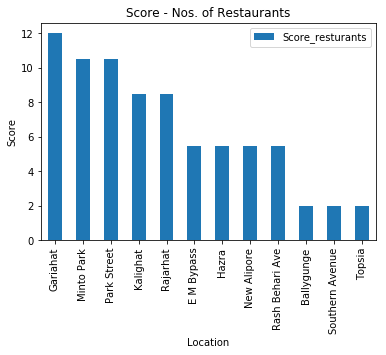

,Nos_of_restaurants,Location,Score_resturants
0,6,Gariahat,12.0
1,5,Minto Park,10.5
2,5,Park Street,10.5
3,3,Kalighat,8.5
4,3,Rajarhat,8.5
5,2,E M Bypass,5.5
6,2,Hazra,5.5
7,2,New Alipore,5.5
8,2,Rash Behari Ave,5.5
9,1,Ballygunge,2.0


In [20]:
resturant_df["Score_resturants"]= resturant_df["Nos_of_restaurants"].rank(ascending=True)
resturant_df.plot('Location','Score_resturants', kind= 'bar')
plt.title("Score - Nos. of Restaurants")
plt.xlabel("Location")
plt.ylabel("Score")
plt.show()
resturant_df

#### Initiating dataframe for FOLIUM MAP:

In [21]:
map_rest_df=pd.merge(resturant_df,df_final,on="Location")
map_rest_df

,Nos_of_restaurants,Location,Score_resturants,No_of_prop,Price/rentals,Score_prop,latitude,longitude
0,6,Gariahat,12.0,95,41,16.0,22.5196,88.3656
1,5,Minto Park,10.5,48,80,5.5,22.5419,88.3547
2,5,Park Street,10.5,151,85,4.0,22.545,88.3638
3,3,Kalighat,8.5,130,52,10.0,22.5153,88.3477
4,3,Rajarhat,8.5,329,25,24.0,22.6232,88.4437
5,2,E M Bypass,5.5,72,64,7.0,22.495,88.3992
6,2,Hazra,5.5,78,46,13.0,22.5227,88.3499
7,2,New Alipore,5.5,76,30,21.5,22.5104,88.3358
8,2,Rash Behari Ave,5.5,81,49,11.5,22.5171,88.3457
9,1,Ballygunge,2.0,103,39,17.0,22.5192,88.3722


#### Generating Folium Map  for restaurants

In [22]:

map_city_resturant = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, label in zip(map_rest_df['latitude'], map_rest_df['longitude'], map_rest_df['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_city_resturant)  
    
map_city_resturant

<hr></hr>
<hr></hr>

<a id="hotel_anal"></a>

## 6. ANALYZING/ SCORING LOCATIONS BASED ON HOTELS : CRITERIA-3

### In this section, we will analyze each location/ area based on the number of hotels available based upon FOURSQUARE API.

#### Each location will be provided a score based upon the number of hotels available in the location/ area.

#### Creating a Dataframe indicating number of hotels for each location/ area.

In [23]:
final_df["hotel"]=final_df["Venue Category"].str.find("Hotel")
hotel_df=final_df[final_df['hotel']!=-1]
df_hotel=hotel_df.groupby("Location").count()
df_hotel.sort_values("Venue Category", ascending= False, inplace = True)
df_hotel.reset_index(inplace= True)
hotels_df=pd.DataFrame(np.array(df_hotel["Location"]), np.array(df_hotel["Venue"]))
hotels_df.reset_index(inplace= True)
hotels_df.rename(columns={"index":"Nos_of_hotels", 0:"Location"}, inplace= True)
hotels_df

,Nos_of_hotels,Location
0,3,Minto Park
1,2,New Town
2,1,Gariahat
3,1,Hazra
4,1,Kalighat
5,1,Rajarhat
6,1,Southern Avenue


#### Scoring each location/ area based on the number of hotels and creating a dataframe

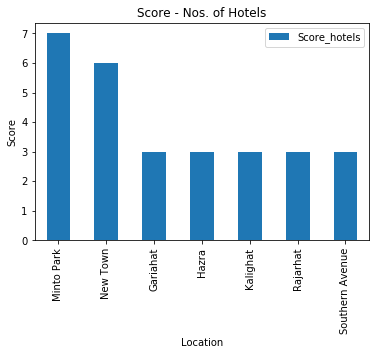

,Nos_of_hotels,Location,Score_hotels
0,3,Minto Park,7.0
1,2,New Town,6.0
2,1,Gariahat,3.0
3,1,Hazra,3.0
4,1,Kalighat,3.0
5,1,Rajarhat,3.0
6,1,Southern Avenue,3.0


In [24]:
hotels_df["Score_hotels"]= hotels_df["Nos_of_hotels"].rank(ascending=True)
hotels_df.plot('Location','Score_hotels', kind= 'bar')
plt.title("Score - Nos. of Hotels")
plt.xlabel("Location")
plt.ylabel("Score")
plt.show()
hotels_df

#### Initiating dataframe for FOLIUM MAP:

In [25]:
map_city_hotel=pd.merge(hotels_df, df_final, on="Location")
map_city_hotel

,Nos_of_hotels,Location,Score_hotels,No_of_prop,Price/rentals,Score_prop,latitude,longitude
0,3,Minto Park,7.0,48,80,5.5,22.5419,88.3547
1,2,New Town,6.0,168,44,15.0,22.5883,88.4734
2,1,Gariahat,3.0,95,41,16.0,22.5196,88.3656
3,1,Hazra,3.0,78,46,13.0,22.5227,88.3499
4,1,Kalighat,3.0,130,52,10.0,22.5153,88.3477
5,1,Rajarhat,3.0,329,25,24.0,22.6232,88.4437
6,1,Southern Avenue,3.0,53,45,14.0,22.5267,88.3524


#### Generating Folium Map for hotels

In [26]:
map_hotel_city = folium.Map(location=[latitude, longitude], zoom_start=11)


for lat, lng, label in zip(map_city_hotel['latitude'], map_city_hotel['longitude'], map_city_hotel['Location']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hotel_city)  
    
map_hotel_city

<hr></hr>
<hr></hr>

<a id="Airport"></a>

## 7. SCORING LOCATIONS BASED ON DISTANCE FROM AIRPORT: CRITERIA -4

### In this section, we would score the locations based on the last criteria, i.e, distance from airport.

#### Since the last criteria will be evaluated in this section, this also gives us the scope to make suitable changes in data and dataframes, which will be finally utilized for final Ranking of the locations. Hence, in this section, we would also make necessary changes in dataframe for final evaluation.

#### Merging scoring dataframe for resturants and hotels

In [27]:
df_example=pd.merge(resturant_df,hotels_df, on= "Location", how='left')
df_example

,Nos_of_restaurants,Location,Score_resturants,Nos_of_hotels,Score_hotels
0,6,Gariahat,12.0,1.0,3.0
1,5,Minto Park,10.5,3.0,7.0
2,5,Park Street,10.5,NaN,NaN
3,3,Kalighat,8.5,1.0,3.0
4,3,Rajarhat,8.5,1.0,3.0
5,2,E M Bypass,5.5,NaN,NaN
6,2,Hazra,5.5,1.0,3.0
7,2,New Alipore,5.5,NaN,NaN
8,2,Rash Behari Ave,5.5,NaN,NaN
9,1,Ballygunge,2.0,NaN,NaN


#### Merging scoring dataframe for restaurants,hotels, property along with latitude & longitude

In [28]:
df_example2=pd.merge(df_final, df_example, on="Location", how= "left")
df_example2

,Location,No_of_prop,Price/rentals,Score_prop,latitude,longitude,Nos_of_restaurants,Score_resturants,Nos_of_hotels,Score_hotels
0,Rajarhat,329,25,24.0,22.6232,88.4437,3.0,8.5,1.0,3.0
1,Garia,58,26,23.0,22.4661,88.4051,NaN,NaN,NaN,NaN
2,Action Area 2,56,30,21.5,22.5595,88.4917,NaN,NaN,NaN,NaN
3,New Alipore,76,30,21.5,22.5104,88.3358,2.0,5.5,NaN,NaN
4,Kasba East,81,33,20.0,22.5143,88.4056,NaN,NaN,NaN,NaN
5,Kasba,101,38,18.5,22.5143,88.4056,NaN,NaN,NaN,NaN
6,Bhawanipur,63,38,18.5,22.5324,88.3426,NaN,NaN,NaN,NaN
7,Ballygunge,103,39,17.0,22.5192,88.3722,1.0,2.0,NaN,NaN
8,Gariahat,95,41,16.0,22.5196,88.3656,6.0,12.0,1.0,3.0
9,New Town,168,44,15.0,22.5883,88.4734,NaN,NaN,NaN,NaN


### Getting the cordinates for the city airport from GEOLOCATOR library.

In [29]:
addressairport = ("Airport, " + city +", India")
geolocator = Nominatim(user_agent="ny_explorer")
locationairport = geolocator.geocode(addressairport)
latitudeairport = locationairport.latitude
longitudeairport = locationairport.longitude
print('The geograpical coordinate of ', addressairport,' are {}, {}.'.format(latitudeairport, longitudeairport))

The geograpical coordinate of  Airport, kolkata, India  are 22.6564148, 88.44614133761.


#### Calculating distance from city airport 

In [30]:
from math import *
distance =[]
for i in range(0, len(df_example2['Location'])):
    lon1, lat1, lon2, lat2 = map(radians, [longitudeairport,latitudeairport,df_example2['longitude'][i],df_example2['latitude'][i]])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    d= c*r
    distance.append(d)

df_example2['distance_airport']= distance
df_example2

,Location,No_of_prop,Price/rentals,Score_prop,latitude,longitude,Nos_of_restaurants,Score_resturants,Nos_of_hotels,Score_hotels,distance_airport
0,Rajarhat,329,25,24.0,22.6232,88.4437,3.0,8.5,1.0,3.0,3.702209
1,Garia,58,26,23.0,22.4661,88.4051,NaN,NaN,NaN,NaN,21.573921
2,Action Area 2,56,30,21.5,22.5595,88.4917,NaN,NaN,NaN,NaN,11.745641
3,New Alipore,76,30,21.5,22.5104,88.3358,2.0,5.5,NaN,NaN,19.800499
4,Kasba East,81,33,20.0,22.5143,88.4056,NaN,NaN,NaN,NaN,16.336500
5,Kasba,101,38,18.5,22.5143,88.4056,NaN,NaN,NaN,NaN,16.336500
6,Bhawanipur,63,38,18.5,22.5324,88.3426,NaN,NaN,NaN,NaN,17.407366
7,Ballygunge,103,39,17.0,22.5192,88.3722,1.0,2.0,NaN,NaN,17.045905
8,Gariahat,95,41,16.0,22.5196,88.3656,6.0,12.0,1.0,3.0,17.310138
9,New Town,168,44,15.0,22.5883,88.4734,NaN,NaN,NaN,NaN,8.077679


### Scoring location based upon distance from city airport

In [31]:
df_example2["Airport_distance_score"]= df_example2["distance_airport"].rank(ascending= False)
df_example2

,Location,No_of_prop,Price/rentals,Score_prop,latitude,longitude,Nos_of_restaurants,Score_resturants,Nos_of_hotels,Score_hotels,distance_airport,Airport_distance_score
0,Rajarhat,329,25,24.0,22.6232,88.4437,3.0,8.5,1.0,3.0,3.702209,21.0
1,Garia,58,26,23.0,22.4661,88.4051,NaN,NaN,NaN,NaN,21.573921,1.0
2,Action Area 2,56,30,21.5,22.5595,88.4917,NaN,NaN,NaN,NaN,11.745641,17.0
3,New Alipore,76,30,21.5,22.5104,88.3358,2.0,5.5,NaN,NaN,19.800499,2.0
4,Kasba East,81,33,20.0,22.5143,88.4056,NaN,NaN,NaN,NaN,16.336500,12.5
5,Kasba,101,38,18.5,22.5143,88.4056,NaN,NaN,NaN,NaN,16.336500,12.5
6,Bhawanipur,63,38,18.5,22.5324,88.3426,NaN,NaN,NaN,NaN,17.407366,7.0
7,Ballygunge,103,39,17.0,22.5192,88.3722,1.0,2.0,NaN,NaN,17.045905,10.0
8,Gariahat,95,41,16.0,22.5196,88.3656,6.0,12.0,1.0,3.0,17.310138,9.0
9,New Town,168,44,15.0,22.5883,88.4734,NaN,NaN,NaN,NaN,8.077679,19.0


#### Dropping unwanted columns and keepin only relevant columns, replacing "NaN" Values with "0"

In [32]:
df_example2.drop(['No_of_prop','Price/rentals', 'latitude','longitude','Nos_of_restaurants','Nos_of_hotels','distance_airport'], axis=1, inplace= True)
df_example2['Score_hotels']= df_example2['Score_hotels'].fillna(0)
df_example2['Score_resturants']= df_example2['Score_resturants'].fillna(0)
df_example2.sort_values("Airport_distance_score", ascending= False, inplace= True)
df_example2

,Location,Score_prop,Score_resturants,Score_hotels,Airport_distance_score
0,Rajarhat,24.0,8.5,3.0,21.0
16,Lake Town,8.0,0.0,0.0,20.0
9,New Town,15.0,0.0,0.0,19.0
12,Salt Lake City,11.5,0.0,0.0,18.0
2,Action Area 2,21.5,0.0,0.0,17.0
19,Park Street,4.0,10.5,0.0,16.0
15,Topsia,9.0,2.0,0.0,15.0
18,Minto Park,5.5,10.5,7.0,14.0
4,Kasba East,20.0,0.0,0.0,12.5
5,Kasba,18.5,0.0,0.0,12.5


#### Visualizing scores based on distance from cirty airport

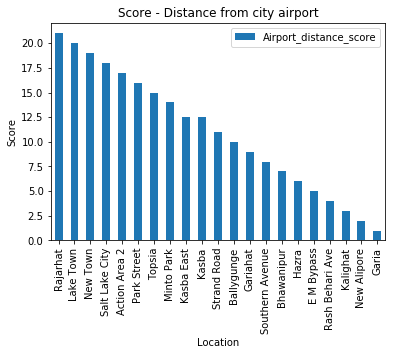

In [33]:
df_example2.plot("Location", "Airport_distance_score", kind="bar")
plt.title("Score - Distance from city airport")
plt.ylabel("Score")
plt.xlabel("Location")
plt.show()

<hr></hr>
<hr></hr>

<a id="weightage"></a>


## 8. USER PREFERENCE AND WEIGHT FOR EACH CRITERIA 

### In this section, the user will be prompted to assign weights to each of the criteria, i.e for:

1. Property rates.
2. Number of restaurants.
3. Number of hotels.
4. Distance from city airport.

### Define Function for error handling/ exception handling:

In [34]:
def check_input():
    print("Assigning Weights")
    
    while True:
        try:
            weight_resturant=float(input("\nEnter Weight for resturants"))
            break
        except ValueError:
            print("Input has to a number or float.")
    while True: 
        try:
            weight_hotel=float(input("\nEnter Weight for hotels"))
            break
        except ValueError:
            print("Input has to a number or float.")
    while True:
        try:
            weight_prop=float(input("\nEnter Weight for property price/rentals"))
            break
        except ValueError:
            printprint("Input has to a number or float, or you have entered a negative number.")
    while True:
        try:
            weight_airport=float(input("\nEnter Weight for airport distance"))
            break
        except ValueError:
            printprint("Input has to a number or float, or you have entered a negative number.")
    sumtotal=weight_resturant+weight_hotel+weight_prop+weight_airport
    print(sumtotal)
        
    return weight_resturant,weight_hotel,weight_prop,weight_airport  

### Code for assigning weights.

### Please follow the below rules for assigning weights:

1. Weights will be assigned on a scale of 0 -100, of 100 being the highest importance.
2. The sum of weights has to be 100.
3. Use only numbers, decimals can also be entered, for e.g: 20.50, 30.75 etc.
4. Do not use negative numbers as weights.
5. If criteria 2,3 and 4 above are not met, the program for assigning weights will give an error messgae and will automatically restart.

In [35]:
weight_array=np.array(check_input())
for i in range(0,4):
    while weight_array[i]<0:
        print("\n\nONE OR MORE WEIGHTS IS NEGATIVE....PLEASE ASSIGN WEIGHTS AGAIN")
        weight_array=np.array(check_input())
        while weight_array[0]+weight_array[1]+weight_array[2]+weight_array[3]!=float(100):
            print("\n\nSUM OF WEIGHTS IS NOT 100....PLEASE ASSIGN WEIGHTS AGAIN")
            weight_array=np.array(check_input())
        print("\n\nWEIGHTS ASSIGNED") 
        print("\n\nWEIGHT FOR RESTURANTS :", weight_array[0])
        print("\n\nWEIGHT FOR HOTELS:", weight_array[1])
        print("\n\nWEIGHT FOR PROPERTY PRICE/RENTALS :", weight_array[2])
        print("\n\nWEIGHT FOR DISTANCE FROM AIRPORT :", weight_array[3])


Assigning Weights



Enter Weight for resturants g


Input has to a number or float.



Enter Weight for resturants -2

Enter Weight for hotels 34

Enter Weight for property price/rentals 34

Enter Weight for airport distance 34


100.0


ONE OR MORE WEIGHTS IS NEGATIVE....PLEASE ASSIGN WEIGHTS AGAIN
Assigning Weights



Enter Weight for resturants 20

Enter Weight for hotels 20

Enter Weight for property price/rentals 20

Enter Weight for airport distance 20


80.0


SUM OF WEIGHTS IS NOT 100....PLEASE ASSIGN WEIGHTS AGAIN
Assigning Weights



Enter Weight for resturants 35

Enter Weight for hotels 35

Enter Weight for property price/rentals 10

Enter Weight for airport distance 20


100.0


WEIGHTS ASSIGNED


WEIGHT FOR RESTURANTS : 35.0


WEIGHT FOR HOTELS: 35.0


WEIGHT FOR PROPERTY PRICE/RENTALS : 10.0


WEIGHT FOR DISTANCE FROM AIRPORT : 20.0


<hr></hr>
<hr></hr>

<a id ="FINAL">

## 9. FINAL SCORING- CHOSING THE BEST LOCATION

### In this final section, we assign score to each location/ area based upon the weightage provided by the user in the section above.

### The final score for each location is the summation of the weighted product of each creiteria score and weights chosen for that criteria, i.e.

<hr></hr>

#### Final Score of each location = (Score for property * Weight for property) + (Score for restaurant * Weight for restaurant) + (Score for hotel * Weight for hotel) + (Score for airport distance * Weight for city airport distance)

<hr></hr>
<br></br>
               

### Creating the final dataframe basd upon the abobve formula and sorting as per Final Score

In [36]:
df_example2["Weighted_score_rest"]=df_example2['Score_resturants']*weight_array[0]
df_example2["Weighted_score_hotels"]=df_example2['Score_hotels']*weight_array[1]
df_example2["Weighted_score_prop"]=df_example2['Score_prop']*weight_array[2]
df_example2["Weighted_score_airport"]=df_example2['Airport_distance_score']*weight_array[3]
df_example2['Final Score']=df_example2["Weighted_score_rest"]+df_example2["Weighted_score_hotels"]+df_example2["Weighted_score_prop"]+df_example2["Weighted_score_airport"]
df_example2.drop(['Score_prop', 'Score_resturants', 'Score_hotels','Airport_distance_score'], axis=1, inplace= True)
df_example2.sort_values('Final Score', ascending= False, inplace= True)
df_example2

,Location,Weighted_score_rest,Weighted_score_hotels,Weighted_score_prop,Weighted_score_airport,Final Score
0,Rajarhat,297.5,105.0,240.0,420.0,1062.5
18,Minto Park,367.5,245.0,55.0,280.0,947.5
8,Gariahat,420.0,105.0,160.0,180.0,865.0
19,Park Street,367.5,0.0,40.0,320.0,727.5
14,Kalighat,297.5,105.0,100.0,60.0,562.5
2,Action Area 2,0.0,0.0,215.0,340.0,555.0
11,Hazra,192.5,105.0,130.0,120.0,547.5
9,New Town,0.0,0.0,150.0,380.0,530.0
16,Lake Town,0.0,0.0,80.0,400.0,480.0
12,Salt Lake City,0.0,0.0,115.0,360.0,475.0


### Displaying the top 10 locations of the city based upon user criteria

In [37]:
df_final_score=df_example2[['Location','Final Score']].head(10)
df_final_score.reset_index(inplace= True)
df_final_score.drop('index', axis=1, inplace= True)
df_final_score['Rank']=df_final_score['Final Score'].rank(ascending= False)
df_final_score

,Location,Final Score,Rank
0,Rajarhat,1062.5,1.0
1,Minto Park,947.5,2.0
2,Gariahat,865.0,3.0
3,Park Street,727.5,4.0
4,Kalighat,562.5,5.0
5,Action Area 2,555.0,6.0
6,Hazra,547.5,7.0
7,New Town,530.0,8.0
8,Lake Town,480.0,9.0
9,Salt Lake City,475.0,10.0


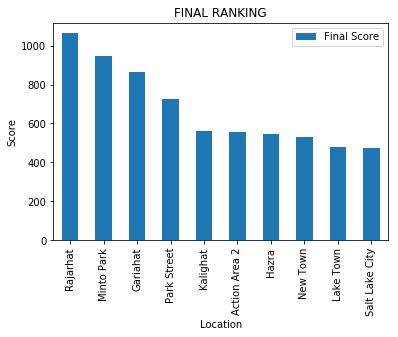

In [39]:
df_final_score.plot('Location','Final Score', kind='bar')
plt.title("FINAL RANKING")
plt.xlabel("Location")
plt.ylabel("Score")
plt.show()

<hr></hr>
<h3 align = center>END OF NOTEBOOK</h3>
<hr></hr>